## End to End Employee Salary Prediction with AWS Sagemaker

#### TASK 1: UNDERSTAND THE PROBLEM STATEMENT

* The objective of this project is to predict the salary employee using the number of years of experience as a factor.
* In simple linear regression, we predict the value of one variable y based on variable x.
x is called the independent/feature variable and y is called the dependant/target variable.
* Why simple? Because it examines relationship between two variables only.
* Why linear? when the independent variable(x) increases or decreases, the dependent variable (y) increases or decreases in a linear fashion.

#### TASK #2: IMPORT LIBRARIES AND LOAD DATASETS

In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score
import boto3
import sagemaker
from sagemaker import Session
import io ## The io module allows for dealing with various types of I/O (text I/O, binary I/O and raw I/O).
import os
import sagemaker.amazon.common as smac   #
from sagemaker.amazon.amazon_estimator import get_image_uri
from sagemaker.deserializers import JSONDeserializer
from sagemaker.serializers import CSVSerializer
import re

In [2]:
df = pd.read_csv('salary.csv')

In [3]:
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [4]:
print('Total number of rows: {}'.format(df.shape[0]))
print('Total number of columns: {}'.format(df.shape[1]))

Total number of rows: 35
Total number of columns: 2


In [5]:
print('The highest paid salary: ${}'.format(df['Salary'].max()))
print('The least paid salary: ${}'.format(df['Salary'].min()))
print('The average paid salary: ${}'.format(df['Salary'].mean()))

The highest paid salary: $139465
The least paid salary: $37731
The average paid salary: $83945.6


#### TASK 3: PERFORM EXPLORATORY DATA ANALYSIS AND VISUALIZATION

In [6]:
#Summary statistics
df.describe()

,YearsExperience,Salary
count,35.000000,35.000000
mean,6.308571,83945.600000
std,3.618610,32162.673003
min,1.100000,37731.000000
25%,3.450000,57019.000000
50%,5.300000,81363.000000
75%,9.250000,113223.500000
max,13.500000,139465.000000


In [7]:
#Check for missing data
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [8]:
#Check for dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  35 non-null     float64
 1   Salary           35 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 688.0 bytes


In [9]:
#Convert float64 to float32
df = df.astype('float32')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  35 non-null     float32
 1   Salary           35 non-null     float32
dtypes: float32(2)
memory usage: 408.0 bytes


<Axes: >

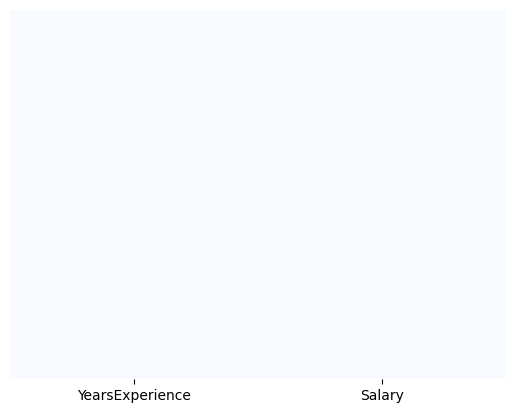

In [11]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='Blues')

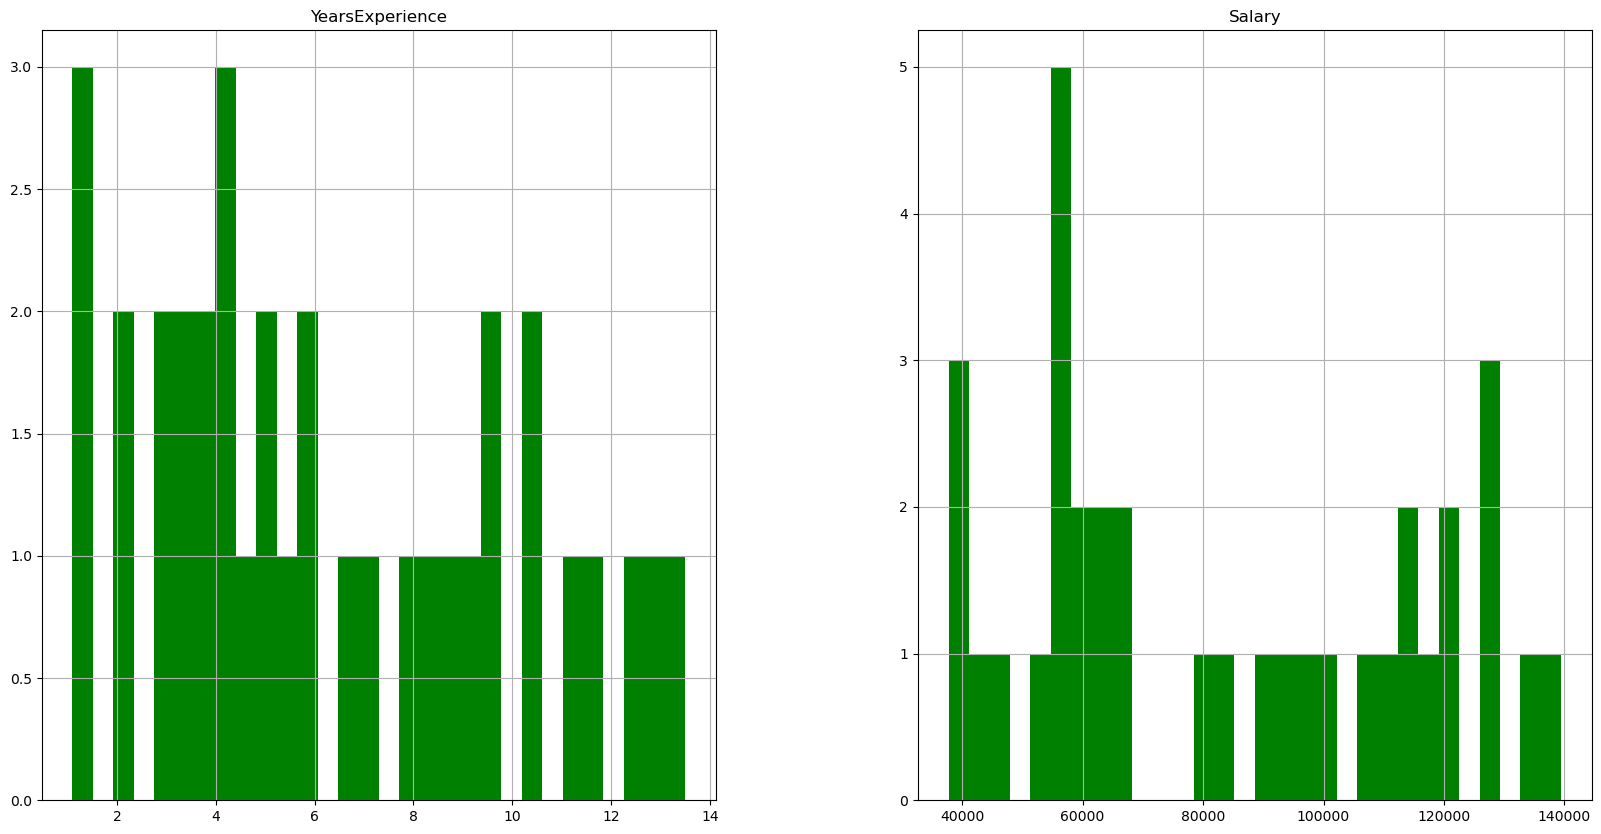

In [12]:
#Plot histogram
df.hist(bins=30, figsize=(20, 10), color = 'g')
plt.show()

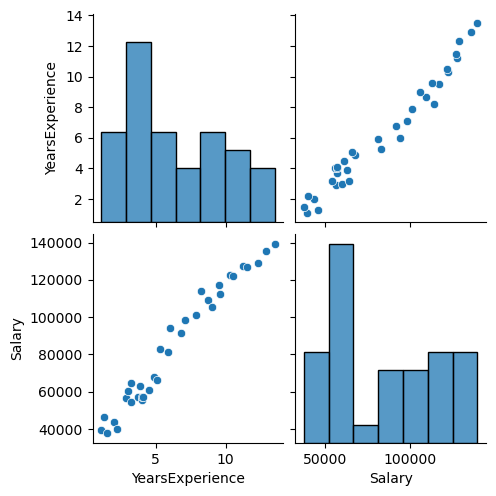

In [13]:
#Plot pairplot
sns.pairplot(df)
plt.show()

<Axes: >

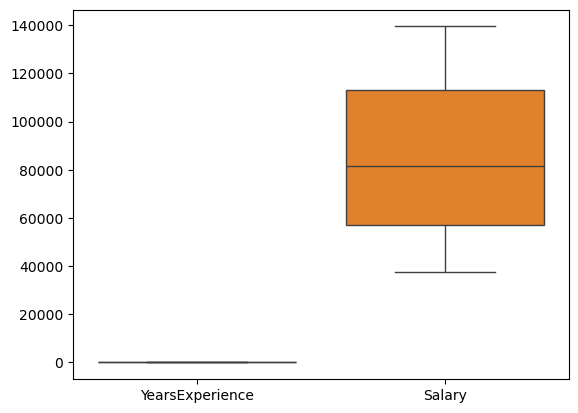

In [14]:
#Plot boxplot for employee salary
sns.boxplot(df)

<Axes: >

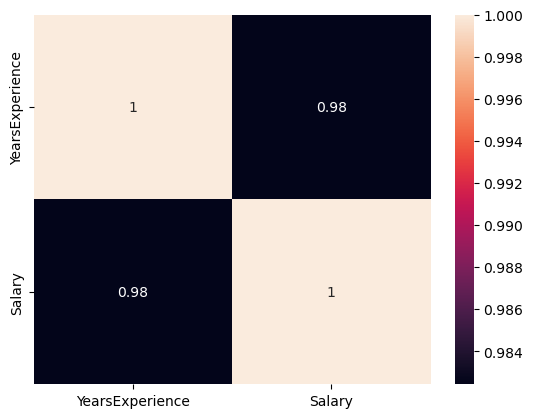

In [15]:
#Plot the heatmap 
corr = df.corr()
sns.heatmap(corr, annot=True)

#### TASK 4: CREATE TRAINING AND TESTING DATASET

Split the dataset into features and target

In [16]:
X = df[['YearsExperience']]   # Feature
y = df[['Salary']]   # Target

In [17]:
X.head()

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2


In [18]:
y.head()

,Salary
0,39343.0
1,46205.0
2,37731.0
3,43525.0
4,39891.0


In [19]:
X.shape, y.shape

((35, 1), (35, 1))

In [20]:
X = np.array(X).astype('float')
y = np.array(y).astype('float')
X[:6]

array([[1.10000002],
       [1.29999995],
       [1.5       ],
       [2.        ],
       [2.20000005],
       [2.9000001 ]])

In [21]:
y[:6]

array([[39343.],
       [46205.],
       [37731.],
       [43525.],
       [39891.],
       [56642.]])

#### TASK #5: TRAIN A LINEAR REGRESSION MODEL

Split the data into training and test sets

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=41)

In [23]:
X_train.shape, X_test.shape

((28, 1), (7, 1))

In [24]:
lr = LinearRegression(fit_intercept=True)
lr.fit(X_train, y_train)

LinearRegression()

In [25]:
acc = lr.score(X_test, y_test)
print(acc)

0.9574908574669008


In [26]:
print('Linear Model Coefficient (m): {}'.format(lr.coef_))
print('Linear Model Intercept (b): {}'.format(lr.intercept_))

Linear Model Coefficient (m): [[8892.1962233]]
Linear Model Intercept (b): [27731.01056269]


#### TASK 6: EVALUATE THE PERFORMANCE OF THE TRAINED MODEL

In [27]:
y_pred = lr.predict(X_test)

In [28]:
y_pred

array([[121099.07090729],
       [ 88197.94657715],
       [ 56186.03890124],
       [147775.65957718],
       [ 67745.89356752],
       [ 74859.6522422 ],
       [ 56186.03890124]])

In [29]:
X_test

array([[10.5       ],
       [ 6.80000019],
       [ 3.20000005],
       [13.5       ],
       [ 4.5       ],
       [ 5.30000019],
       [ 3.20000005]])

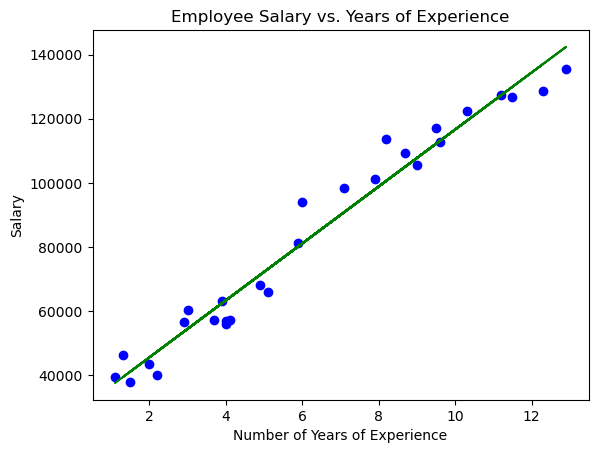

In [30]:
plt.scatter(X_train, y_train, color = 'blue')
plt.plot(X_train, lr.predict(X_train), color='green')
plt.xlabel('Number of Years of Experience')
plt.ylabel('Salary')
plt.title('Employee Salary vs. Years of Experience')
plt.show()

Use the trained model, obtain the salary corresponding to eployees who have years of experience = 7

In [31]:
num_year_experience = [[7]]
salary = lr.predict(num_year_experience)
salary

array([[89976.38412576]])

#### TASK 7: TRAIN A LINEAR LEARNER MODEL USING SAGEMAKER

Create sagemaker session

In [32]:
# sagemaker_session = sagemaker.Session()

# #Create the S3 bucket and its prefix to use for sagemaker session
# bucket = 'sagemaker-ml-100'
# prefix = 'linear-learner' #prefix is the subfolder within the bucket

# #Execute the role for the notebook instance
# role = sagemaker.get_execution_role()
# print(role)

#create a Sagemaker session
sagemaker_session = sagemaker.Session()
bucket = Session().default_bucket()
prefix = 'linear-learner'
role = sagemaker.get_execution_role()
print(bucket)
print(prefix)
print(role)

sagemaker-us-east-1-381491844848
linear-learner
arn:aws:iam::381491844848:role/service-role/AmazonSageMaker-ExecutionRole-20240905T111695


In [33]:
X_train.shape, X_train.dtype

((28, 1), dtype('float64'))

In [34]:
y_train.shape, y_train.dtype

((28, 1), dtype('float64'))

In [35]:
y_train = y_train[:,0]

In [36]:
y_train.shape, y_train.dtype

((28,), dtype('float64'))

In [37]:
#Convert X_train, y_train float64 to float32
X_train = X_train.astype('float32')
y_train = y_train.astype('float32')

In [38]:
X_train.shape, y_train.shape

((28, 1), (28,))

In [39]:
X_train.dtype, y_train.dtype

(dtype('float32'), dtype('float32'))

Convert the training data into io format

In [40]:
# Code below converts the data in numpy array format to RecordIO format
# This is the format required by Sagemaker Linear Learner 

buffer = io.BytesIO() #create an in-memory byte array (buf is a buffer I will be writing to)
smac.write_numpy_to_dense_tensor(buffer, X_train, y_train)
buffer.seek(0)

0

Uploads the data in record-io format to S3 bucket to be accessed later for training

In [41]:
# Key refers to the name of the file
key = 'linear-train-data'

#Upload the data in record-io format
boto3.resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'train', key)).upload_fileobj(buffer)

#Print out the training data location in s3
s3_train_data = 's3://{}/{}/train/{}'.format(bucket, prefix, key)
print('Uploaded training data location: {}'.format(s3_train_data))

Uploaded training data location: s3://sagemaker-us-east-1-381491844848/linear-learner/train/linear-train-data


In [42]:
X_test.shape

(7, 1)

In [43]:
y_test.shape

(7, 1)

In [44]:
#Convert the target label to vector
y_test = y_test[:, 0]

In [45]:
y_test

array([121872.,  91738.,  64445., 139465.,  61111.,  83088.,  54445.])

In [46]:
#Convert the X_test, y_test float64 to float32
X_test = X_test.astype('float32')
y_test = y_test.astype('float32')

In [47]:
X_test.dtype, y_test.dtype

(dtype('float32'), dtype('float32'))

Upload RecordIO data to S3 for the test data

In [48]:
buffer = io.BytesIO() # create an in-memory byte array (buf is a buffer I will be writing to)
smac.write_numpy_to_dense_tensor(buffer, X_test, y_test)

buffer.seek(0)

0

In [49]:
# Key refers to the name of the file
key = 'linear-test-data'

#Upload the data in record-io format to S3 bucket
boto3.resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'test', key)).upload_fileobj(buffer)

# Print out the testing data location in s3
s3_test_data = 's3://{}/{}'.format(bucket, prefix, key)
print('Uploaded training data location: {}'.format(s3_test_data))

Uploaded training data location: s3://sagemaker-us-east-1-381491844848/linear-learner


In [50]:
# create an output placeholder in S3 bucket to store the linear-regression output

output_location = 's3://{}/{}/output'.format(bucket, prefix)
print('Training artifacts will be uploaded to: {}'.format(output_location))

Training artifacts will be uploaded to: s3://sagemaker-us-east-1-381491844848/linear-learner/output


Get the training container of sagemaker built-in algorithms

* Specify the name of the algorithm, that we want to use
* Note: All regression models are named estimators

In [51]:
#Obtain a reference to the linear-learner container image
container = get_image_uri(boto3.Session().region_name, 'linear-learner')

The method get_image_uri has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


In [52]:
linear = sagemaker.estimator.Estimator(container,
                                       role,
                                       instance_count = 1,
                                       instance_type = 'ml.c4.xlarge',
                                       sagemaker_session=sagemaker_session,
                                       train_use_spot_instances = True,
                                       train_max_run = 100,
                                       train_max_wait = 600
)

#Tune the parameters like the number of features that we are passing in, type of predictor like 'regressor' or 'classifier', mini batch size, epochs

# Train 32 different versions of the model and will get the best out of them (built-in parameters optimization!)
linear.set_hyperparameters(feature_dim = 1,
                          predictor_type = 'regressor',
                          mini_batch_size = 5,
                          epochs = 5,
                          num_models = 32,
                          loss = 'absolute_loss')

# Now we are ready to pass in the training data from S3 to train the linear learner model
linear.fit({'train': s3_train_data})

train_max_run has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
train_use_spot_instances has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
train_max_wait has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
INFO:sagemaker:Creating training-job with name: linear-learner-2024-09-05-13-42-54-911


2024-09-05 13:42:56 Starting - Starting the training job...
2024-09-05 13:43:10 Starting - Preparing the instances for training...
2024-09-05 13:43:36 Downloading - Downloading input data...
2024-09-05 13:44:12 Downloading - Downloading the training image.........
2024-09-05 13:45:53 Training - Training image download completed. Training in progress.
2024-09-05 13:45:53 Uploading - Uploading generated training modelDocker entrypoint called with argument(s): train
Running default environment configuration script
[09/05/2024 13:45:46 INFO 140359332706112] Reading default configuration from /opt/amazon/lib/python3.8/site-packages/algorithm/resources/default-input.json: {'mini_batch_size': '1000', 'epochs': '15', 'feature_dim': 'auto', 'use_bias': 'true', 'binary_classifier_model_selection_criteria': 'accuracy', 'f_beta': '1.0', 'target_recall': '0.8', 'target_precision': '0.8', 'num_models': 'auto', 'num_calibration_samples': '10000000', 'init_method': 'uniform', 'init_scale': '0.07', 'in

#### TASK 8: DEPLOY AND TEST THE TRAINED LINEAR LEARNER MODEL

In [53]:
# Deploying the model to perform inference 

linear_regressor = linear.deploy(initial_instance_count=1, instance_type='ml.m4.xlarge')

INFO:sagemaker:Creating model with name: linear-learner-2024-09-05-13-46-42-573
INFO:sagemaker:Creating endpoint-config with name linear-learner-2024-09-05-13-46-42-573
INFO:sagemaker:Creating endpoint with name linear-learner-2024-09-05-13-46-42-573


-------!

In [55]:
#To make inferences on the model, pass the data in text csv format
linear_regressor.content_type= 'text/csv'
linear_regressor.serializer = CSVSerializer()
linear_regressor.deserializerr = JSONDeserializer()

In [74]:
#Making prediction on the test data
result = linear_regressor.predict(X_test).decode('utf-8')

In [75]:
result

'{"predictions": [{"score": 124073.796875}, {"score": 92629.265625}, {"score": 62034.5859375}, {"score": 149569.359375}, {"score": 73082.6640625}, {"score": 79881.484375}, {"score": 62034.5859375}]}'

In [76]:
pattern = r'\"(\w)\":'
cleaned_data = re.sub(pattern, r'\1:', result)
print(cleaned_data)

{"predictions": [{"score": 124073.796875}, {"score": 92629.265625}, {"score": 62034.5859375}, {"score": 149569.359375}, {"score": 73082.6640625}, {"score": 79881.484375}, {"score": 62034.5859375}]}


In [80]:
# Delete the end-point

linear_regressor.delete_endpoint()

INFO:sagemaker:Deleting endpoint configuration with name: linear-learner-2024-09-05-13-46-42-573
INFO:sagemaker:Deleting endpoint with name: linear-learner-2024-09-05-13-46-42-573
